# Libraries and data loading

In [5]:
!pip install ta 
!pip install tensorflow

     -------------------------------------- 276.5/276.5 MB 1.6 MB/s eta 0:00:00
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ---------------------------------------- 5.6/5.6 MB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 2.1 MB/s eta 0:00:00
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp310-cp310-win_amd64.whl (1.5 MB)
     -------------------------------------- 422.5/422.5 kB 2.6 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ---------------------------------------- 4.2/4.2 MB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 2.3 MB/s eta 0:00:00
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     ------------------------------

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
from tensorflow import keras
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
%matplotlib inline

from datetime import datetime

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM
import ta
import warnings
warnings.filterwarnings("ignore")
from datetime import date

In [7]:
stock_data = pd.read_csv('GOOG.csv')
stock_data= pd.DataFrame(stock_data)
stock_data

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


The dataset covers a time period from June 14, 2016, to June 11, 2021. Each row represents a specific date's stock market data for Google.

# Exploratory Data Analysis (EDA)

In [8]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [9]:
stock_data.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [10]:
stock_data.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [11]:
stock_data = stock_data.drop(['symbol'],axis=1)### removing the stock symbol information from the dataset.

In [12]:
### spliting the values in the 'date' column by the space character (" ") using the str.split() method
### The parameter n = 1 indicates that the splitting should happen only once
### expand = True ensures that the split parts are expanded into separate columns.
stock_data['date']= stock_data['date'].str.split(" ", n = 1, expand = True)[0]
###The selected date part is then converted to a datetime format using 
stock_data['date']= pd.to_datetime(stock_data['date'])
stock_data

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2016-06-14,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,2016-06-15,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,2016-06-16,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,2016-06-17,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,2016-06-20,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,2021-06-10,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


# Visualization

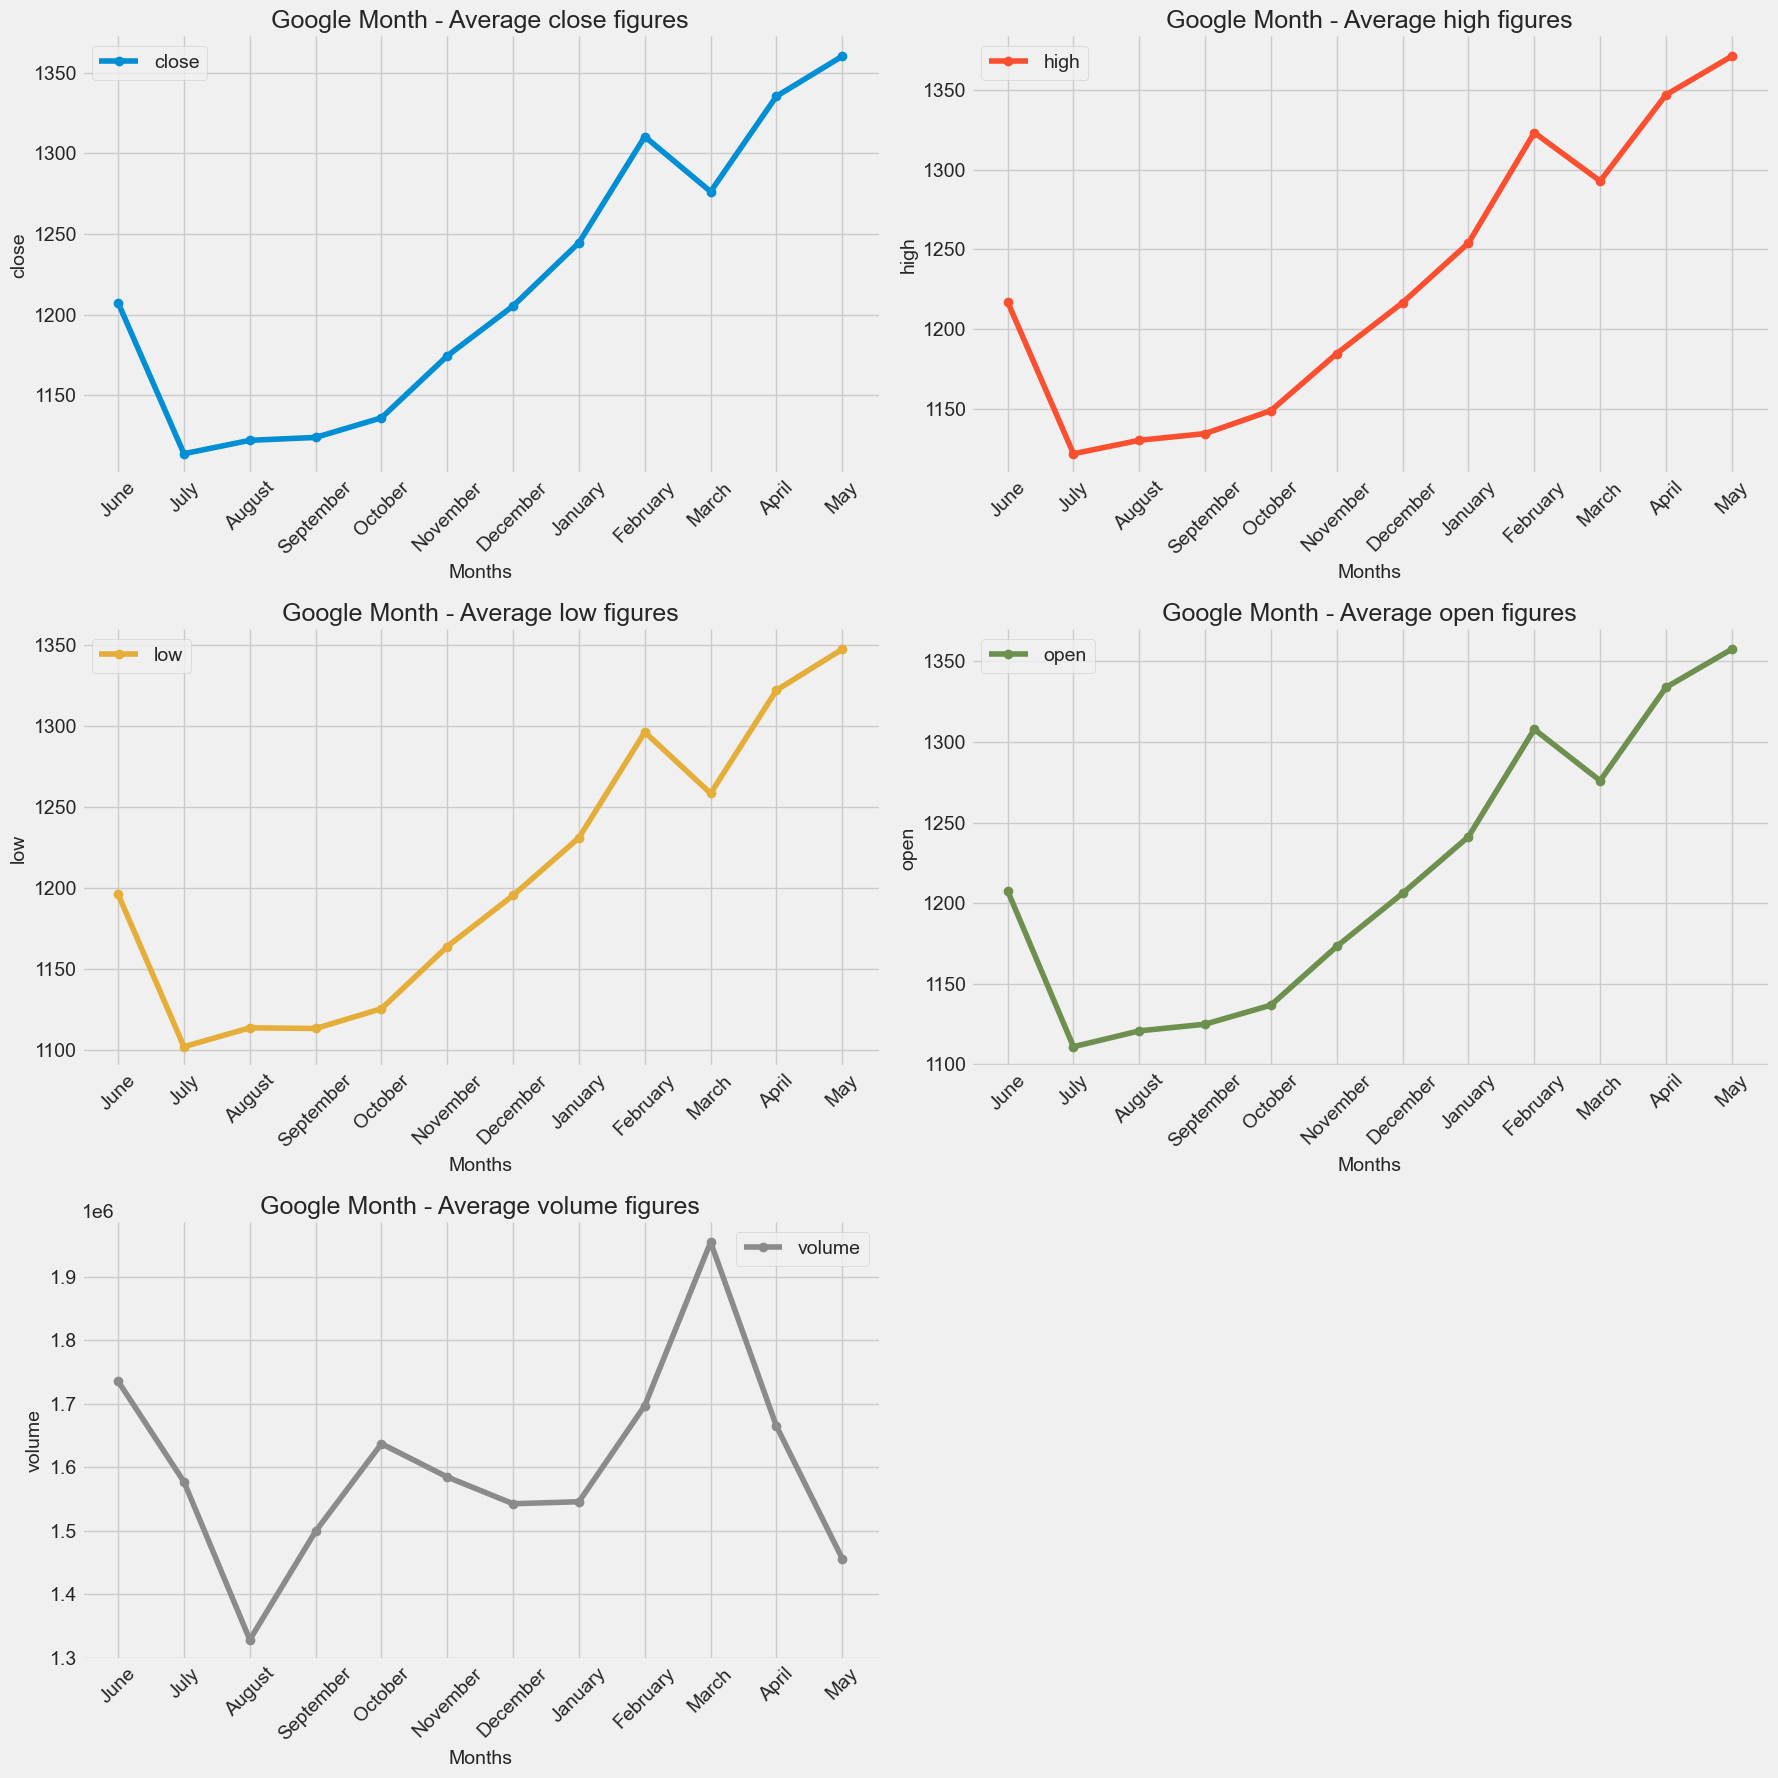

In [13]:
# Convert 'date' column to datetime format
stock_data['date'] = pd.to_datetime(stock_data['date'])

# Set 'date' as the DateTime index
stock_data.set_index('date', inplace=True)

plt.rcParams['font.size'] = 14
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (20, 10)
colors = plt.rcParams["axes.prop_cycle"]()
a1 = 3  # number of rows
a2 = 2  # number of columns
a3 = 1  # initialize plot counter

# Set the figure size of the plot
fig = plt.figure(figsize=(18, 18))

# Specify the columns to plot
columns_to_plot = ['close', 'high', 'low', 'open', 'volume']

# Loop through each column to generate a subplot
for column in columns_to_plot:
    color = next(colors)["color"]
    # Generate a subplot with the given dimensions
    plt.subplot(a1, a2, a3)
    # Plot the data in a line graph, with different colors for each line
    plt.plot(stock_data.groupby(stock_data.index.month_name(), sort=False).mean()[column], color=color, marker='o')
    # Remove the top and right borders
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    # Rotate the x-tick labels by 45 degrees
    plt.xticks(rotation=45)
    # Set the title, x-axis label, y-axis label, and legend
    plt.title(f"Google Month - Average {column} figures", fontsize=18)
    plt.xlabel('Months')
    plt.ylabel(column)
    plt.legend([column])
    # Increment the subplot counter
    a3 = a3 + 1
    
    # Adjust the layout of the plot
plt.tight_layout()
# Show the plot
plt.show()

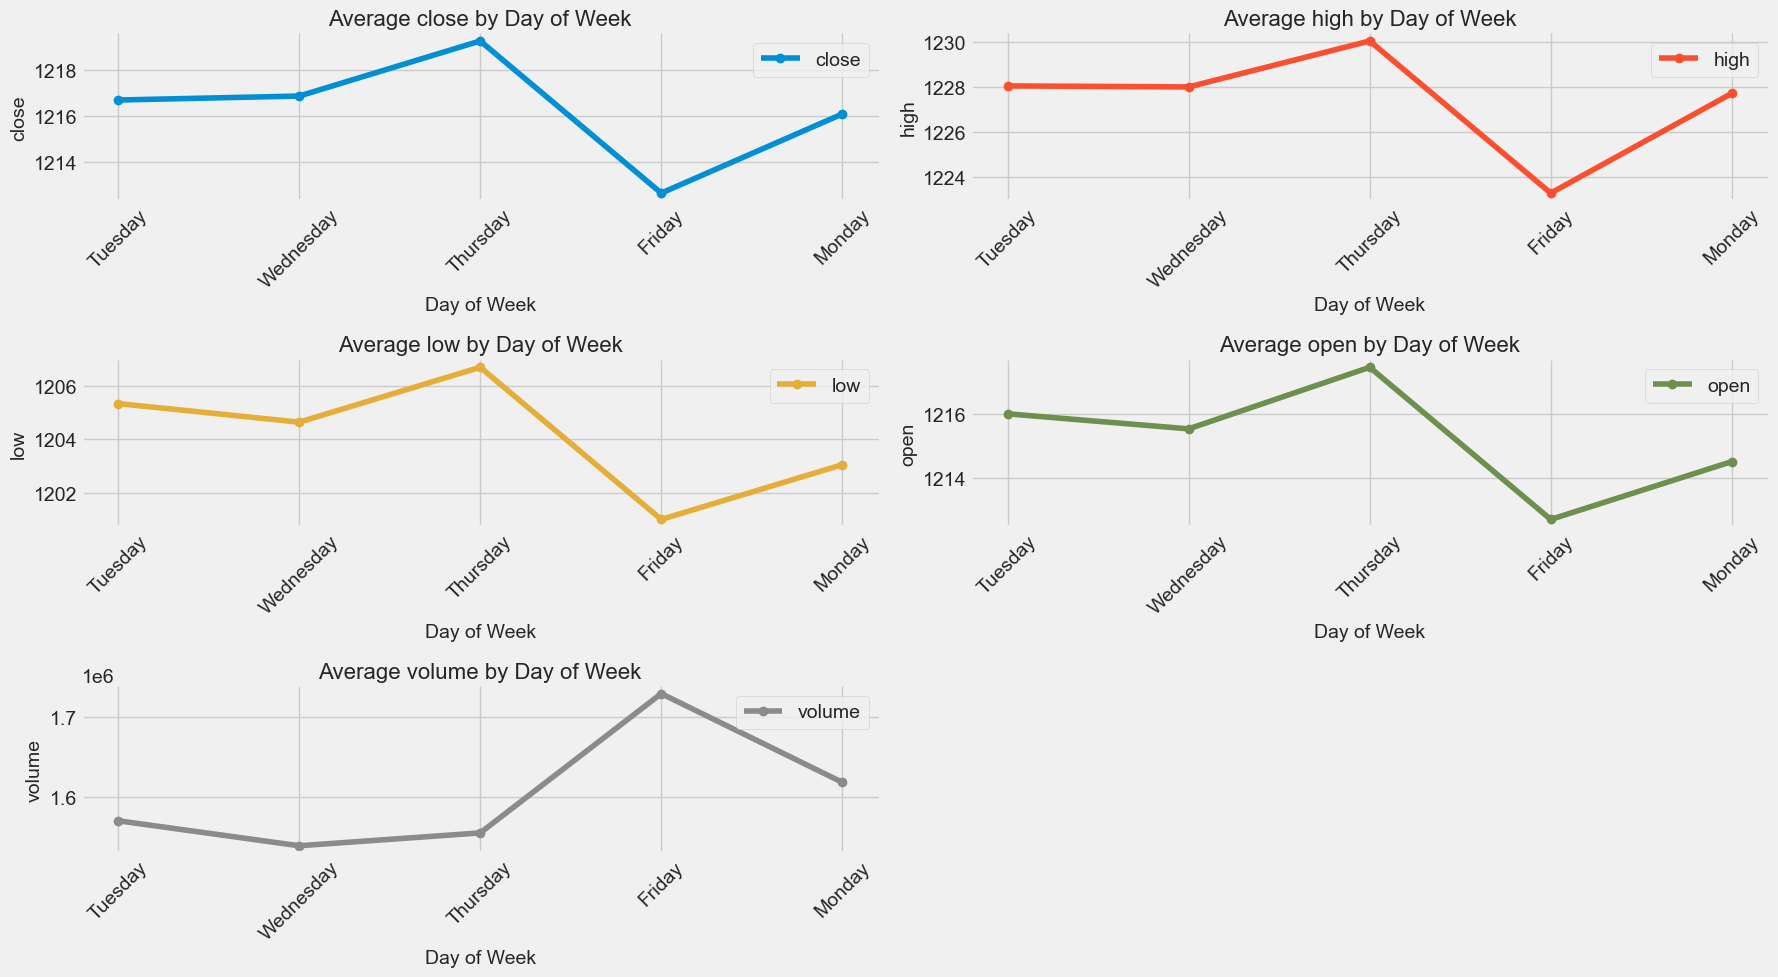

In [14]:
plt.rcParams['font.size'] = 14
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (18, 10)
colors = plt.rcParams["axes.prop_cycle"]()
b1 = 3  # number of rows
b2 = 2  # number of columns
b3 = 1  # initialize plot counter

# Set the figure size of the plot
fig = plt.figure()

# Specify the columns to plot
columns_to_plot = ['close', 'high', 'low', 'open', 'volume']

# Loop through each column to generate a subplot
for column in columns_to_plot:
    color = next(colors)["color"]
    # Generate a subplot with the given dimensions
    plt.subplot(b1, b2, b3)
    # Plot the data in a line graph, with different colors for each line
    plt.plot(stock_data.groupby(stock_data.index.day_name(), sort=False)[column].mean(), color=color, marker='o')
    # Remove the top and right borders
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    # Rotate the x-tick labels by 45 degrees
    plt.xticks(rotation=45)
    # Set the title, x-axis label, y-axis label, and legend
    plt.title(f"Average {column} by Day of Week", fontsize=16)
    plt.xlabel('Day of Week')
    plt.ylabel(column)
    plt.legend([column])
    # Increment the subplot counter
    b3 += 1
    
    # Adjust the layout of the plot
plt.tight_layout()
# Show the plot
plt.show()

Note: * __Close, High, Low, and Open:__ * __Thursday has the highest values for Close, High, Low, and Open compared to other days of the week. This suggests that, on average, the stock prices tend to reach higher levels on Thursdays compared to other days.__ * __Conversely, the lowest values for Close, High, Low, and Open are observed on last day of the week, indicating relatively lower stock prices on fridays.__

Note: * __Volume:__ * __Thursday has the lowest average volume compared to other days of the week. This implies that, on average, there is less trading activity (fewer shares being bought or sold) on Thursdays.__ * __On the other hand, the other days of the week show higher average volumes, indicating increased trading activity and higher liquidity during those days.__

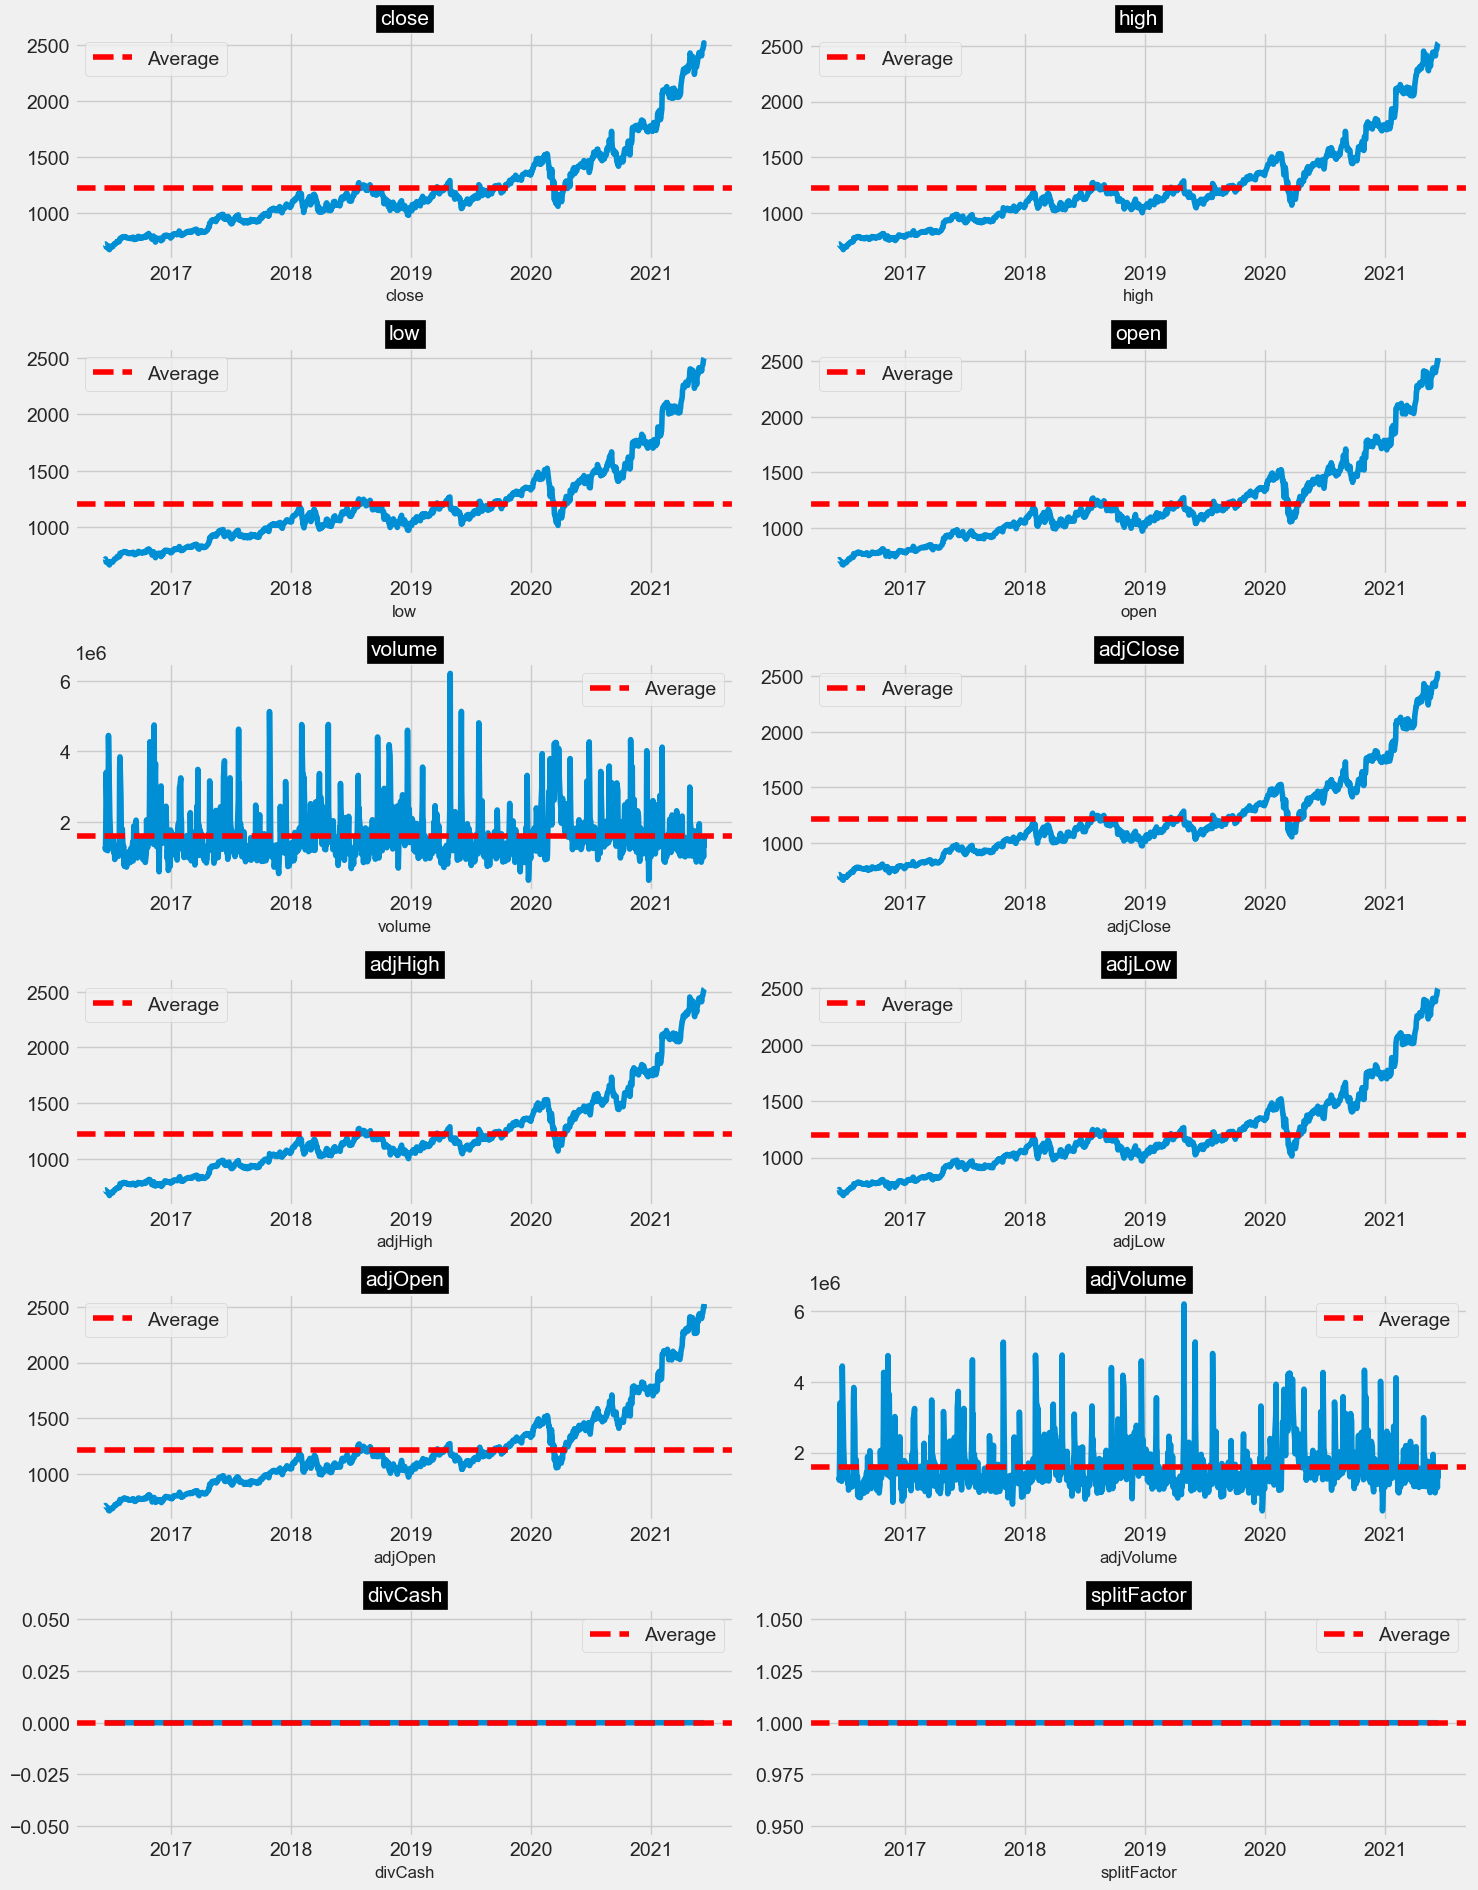

In [15]:
plt.figure(figsize=(15, 25))
for idx, column in enumerate(stock_data):
    plt.subplot(8, 2, idx + 1)
    plt.plot(stock_data.index.values, stock_data[column])
    #Adding a horizontal line for the average of the column
    plt.axhline(stock_data[column].mean(), color='red', linestyle='--', label='Average')
    plt.title(column, backgroundcolor='black', color='white', fontsize=15)
    plt.xlabel(column, size=12)
    plt.legend()
plt.tight_layout()
plt.show()

# Moving Average Plot

In [18]:
stock_data1 = pd.read_csv('GOOG.csv')
stock_data1= pd.DataFrame(stock_data1)
stock_data1 = stock_data1.drop(['symbol'],axis=1)
stock_data1['date']= stock_data1['date'].str.split(" ", n = 1, expand = True)[0]
###The selected date part is then converted to a datetime format using 
stock_data1['date']= pd.to_datetime(stock_data1['date'])
stock_data1

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2016-06-14,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,2016-06-15,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,2016-06-16,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,2016-06-17,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,2016-06-20,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,2021-06-10,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


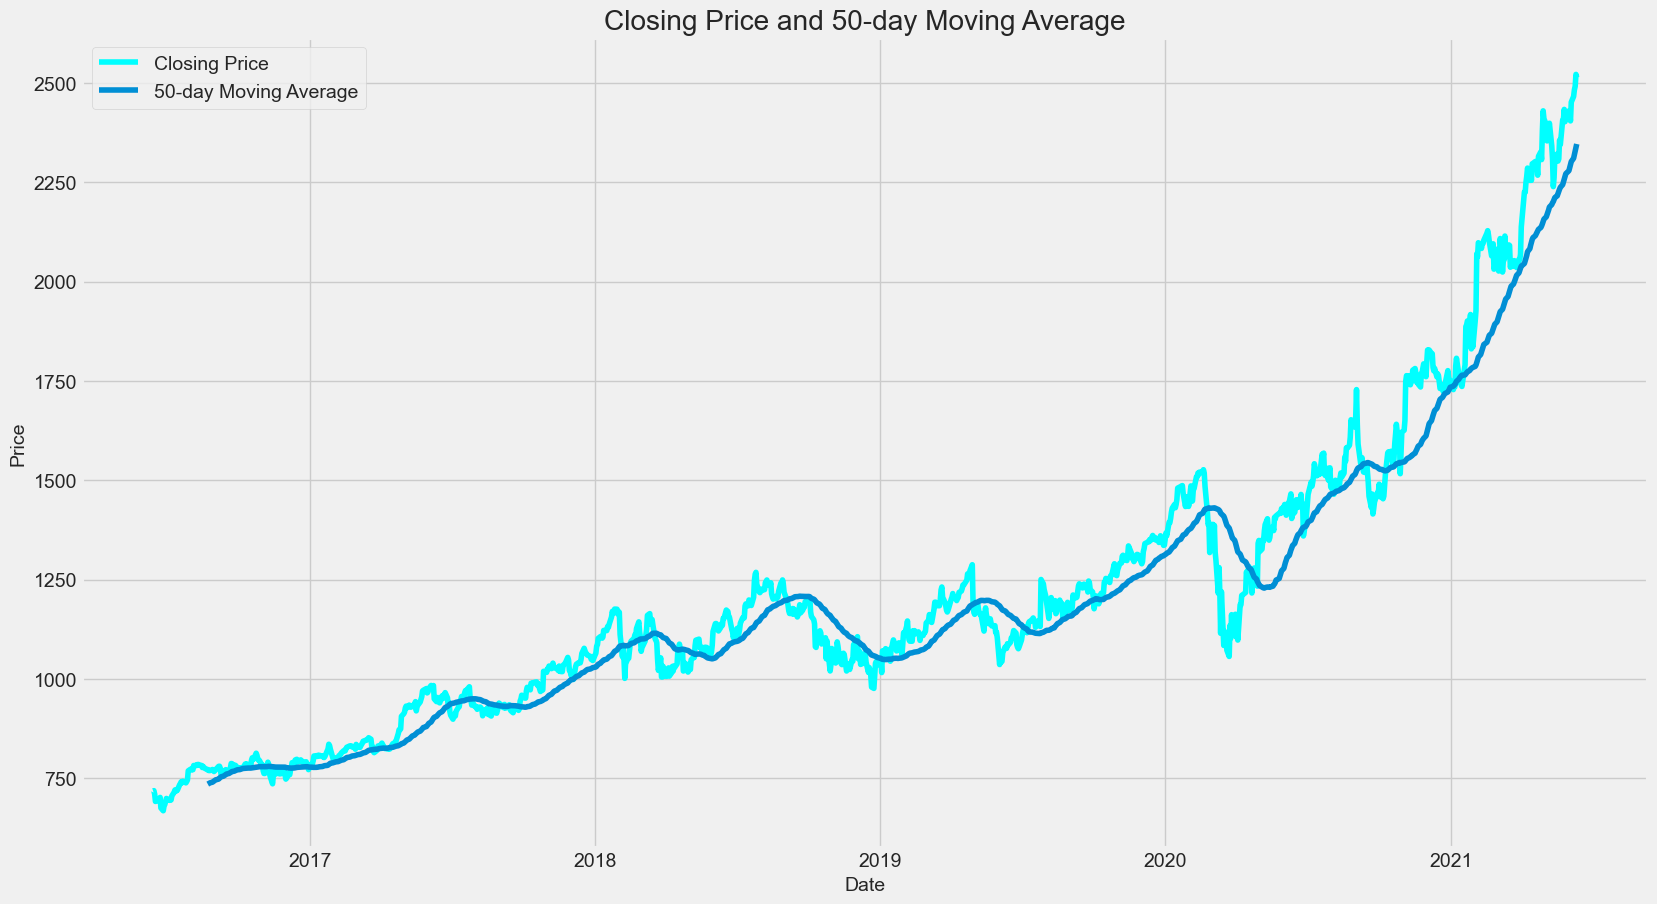

In [19]:
rolling_avg = stock_data1['close'].rolling(window=50).mean()

plt.plot(stock_data1['date'], stock_data1['close'], label='Closing Price',color='cyan')
plt.plot(stock_data1['date'], rolling_avg, label='50-day Moving Average')
##plt.plot(stock_data1['date'], rolling_avg, label='20-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Closing Price and 50-day Moving Average')
plt.legend()
plt.show()

Relative Strength Index (RSI)

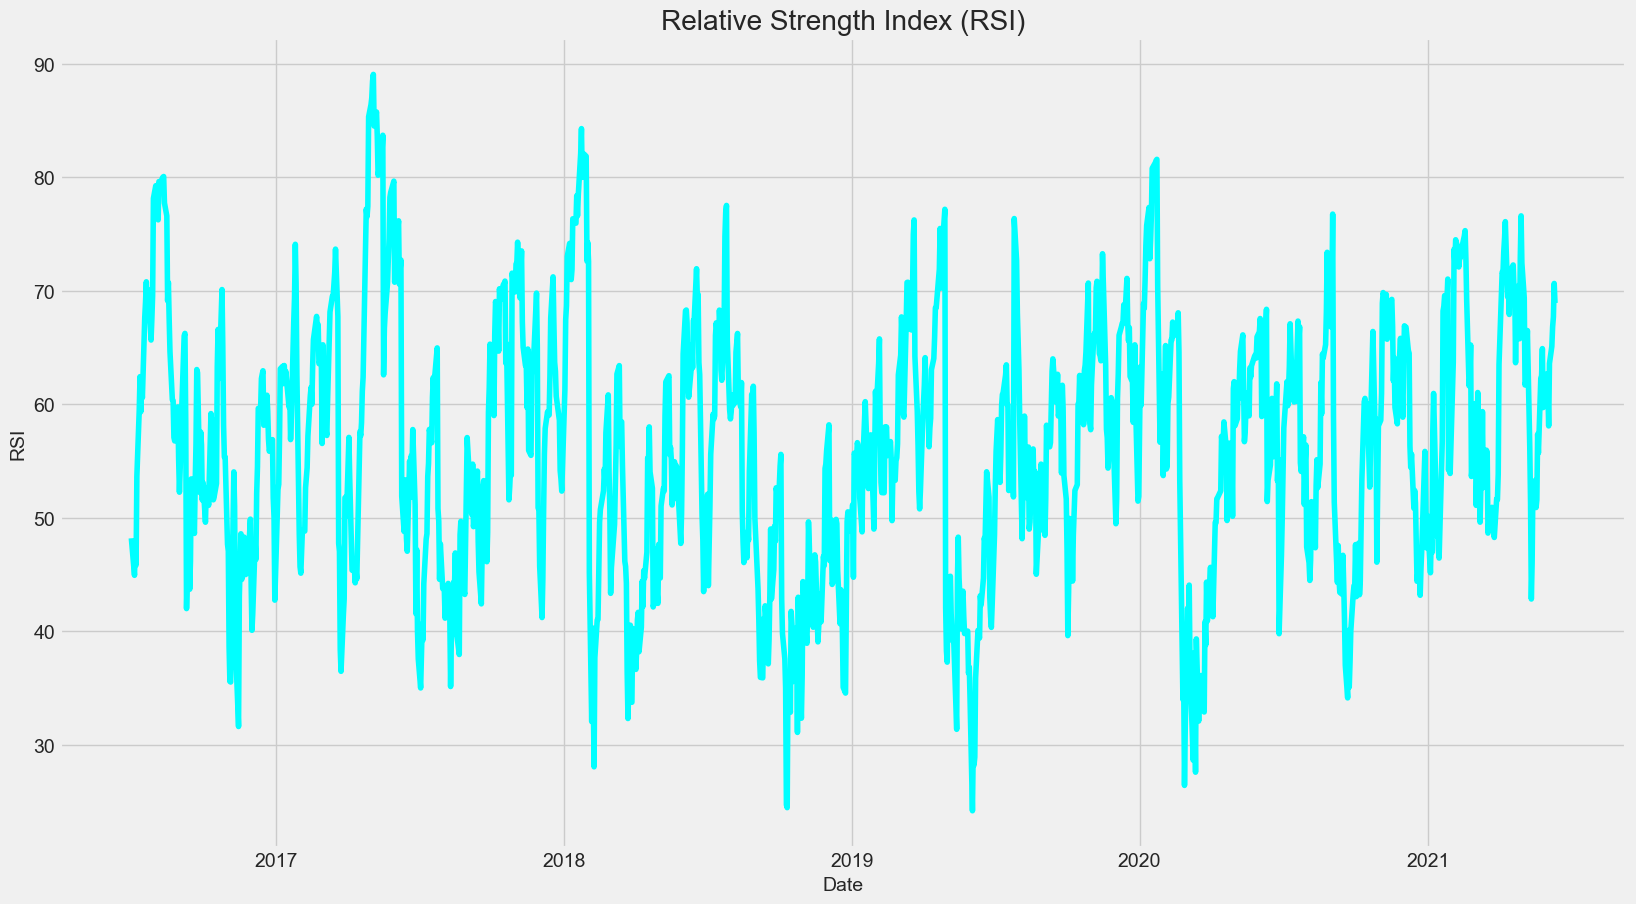

In [20]:
rsi = ta.momentum.RSIIndicator(stock_data1['close']).rsi()

plt.plot(stock_data1['date'], rsi, color='cyan')  # Change the color to red
plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('Relative Strength Index (RSI)')
plt.show()

the highest values of the Relative Strength Index (RSI) are considered to indicate overbought conditions. When the RSI reaches high levels, typically above 70, it suggests that the asset may be overvalued or overbought, and there is a higher probability of a potential price correction or reversal in the near future. It indicates that the buying pressure may have pushed the price to unsustainable levels, and a pullback or downward movement could occur.

Conversely, the lowest values of the RSI are considered to indicate oversold conditions. When the RSI reaches low levels, typically below 30, it suggests that the asset may be undervalued or oversold, and there is a higher probability of a potential price recovery or upward movement in the near future. It indicates that the selling pressure may have pushed the price to excessively low levels, and a rebound or upward movement could occur.

Let's plot four of the indicators in the table and differentiate their corresponding curves by colours

<Axes: xlabel='date'>

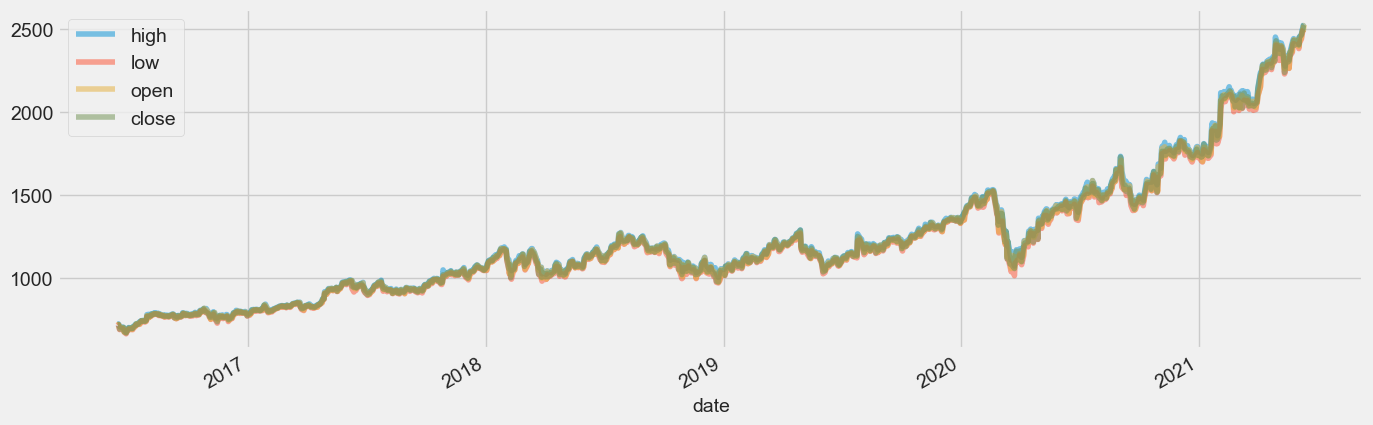

In [21]:
stock_data[['high','low','open','close']].plot(figsize = (15, 5), alpha = 0.5)
###he alpha parameter adjusts the transparency of the lines, with 0.5 indicating 50% transparency

The four had almost same behaviour troughout time and based on this assumption in this project we will only focus on one of them 'High' in order to build a model which could predict future values and then as possible suggestions extrapolate such model to other indicators.

In [22]:
stock_data

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2016-06-14,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
2016-06-15,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2016-06-16,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
2016-06-17,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
2016-06-20,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0


# Modeling

In [23]:
stock_data = stock_data[['high','low','open','close']] # Extracting required columns

In [24]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
stock_data[stock_data.columns] = MMS.fit_transform(stock_data)

In [25]:
stock_data.shape

(1258, 4)

In [26]:
training_size = round(len(stock_data) * 0.80) # Selecting 80 % for training and 20 % for testing
training_size

1006

In [27]:
train_data = stock_data[:training_size]
test_data  = stock_data[training_size:]

train_data.shape, test_data.shape

((1006, 4), (252, 4))

In [28]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [29]:
X_train, y_train = create_sequence(train_data)
X_test, y_test = create_sequence(test_data)

In [30]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((956, 50, 4), (956, 4), (202, 50, 4), (202, 4))

In [31]:
from tensorflow.keras.layers import LSTM, Dropout, Dense
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 4))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['mean_absolute_error'])

print(regressor.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            11000     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [33]:
#model.fit(train_seq, train_label, epochs=80,validation_data=(test_seq, test_label), verbose=1)
regressor.fit(X_train, y_train, epochs = 100,validation_data=(X_test, y_test), batch_size = 32)

Epoch 1/100
30/30 [==============================] - 4s 138ms/step - loss: 4.1328e-04 - mean_absolute_error: 0.0153 - val_loss: 0.0030 - val_mean_absolute_error: 0.0406
Epoch 2/100
30/30 [==============================] - 3s 109ms/step - loss: 4.1292e-04 - mean_absolute_error: 0.0152 - val_loss: 0.0039 - val_mean_absolute_error: 0.0470
Epoch 3/100
30/30 [==============================] - 8s 266ms/step - loss: 3.8683e-04 - mean_absolute_error: 0.0149 - val_loss: 0.0075 - val_mean_absolute_error: 0.0665
Epoch 4/100
30/30 [==============================] - 4s 141ms/step - loss: 3.9479e-04 - mean_absolute_error: 0.0147 - val_loss: 0.0118 - val_mean_absolute_error: 0.0888
Epoch 5/100
30/30 [==============================] - 4s 123ms/step - loss: 3.8901e-04 - mean_absolute_error: 0.0146 - val_loss: 0.0102 - val_mean_absolute_error: 0.0810
Epoch 6/100
30/30 [==============================] - 4s 143ms/step - loss: 3.5460e-04 - mean_absolute_error: 0.0144 - val_loss: 0.0123 - val_mean_absolute_

Loss: The loss values show a decreasing trend throughout the epochs, indicating that the model is improving its fit to the training data. The loss starts at 0.0124 and decreases progressively as the epochs advance. Mean Absolute Error (MAE): The MAE values also demonstrate a decreasing trend over the epochs. The MAE begins at 0.0841 and decreases as the model learns from the training data. Validation Loss: The validation loss values also show a decreasing trend, suggesting that the model is generalizing well to unseen data. The validation loss starts at 0.0515 and decreases over the course of training. Validation Mean Absolute Error (MAE): Similar to the validation loss, the validation MAE decreases throughout the epochs. This indicates that the model's predictions on the validation data are becoming more accurate. The validation MAE starts at 0.2488 and decreases as the model learns

In [34]:
test_predicted = regressor.predict(X_test)
test_predicted[:5]

7/7 [==============================] - 3s 54ms/step


array([[0.48704532, 0.48295745, 0.48019543, 0.48370788],
       [0.49386817, 0.49004114, 0.48713586, 0.49061823],
       [0.4971106 , 0.49312672, 0.4902793 , 0.49378762],
       [0.5164051 , 0.5139109 , 0.5102866 , 0.5136174 ],
       [0.5154851 , 0.5122998 , 0.50898606, 0.51243967]], dtype=float32)

In [35]:
test_inverse_predicted = MMS.inverse_transform(test_predicted) # Inversing scaling on predicted data
test_inverse_predicted[:5]

array([[1575.618 , 1549.5138, 1561.2439, 1564.7351],
       [1588.2725, 1562.5123, 1574.1108, 1577.5425],
       [1594.2861, 1568.1744, 1579.9385, 1583.4164],
       [1630.0714, 1606.3135, 1617.0306, 1620.1677],
       [1628.3651, 1603.357 , 1614.6194, 1617.985 ]], dtype=float32)

In [36]:
# Merging actual and predicted data for better visualization

merge_data = pd.concat([stock_data.iloc[-202:].copy(),pd.DataFrame(test_inverse_predicted,columns=['high_predicted','low_predicted','open_predicted','close_predicted'],index=stock_data.iloc[-202:].index)], axis=1)

In [37]:
merge_data[['high','low','open','close']] = MMS.inverse_transform(merge_data[['high','low','open','close']]) # Inverse scaling

In [38]:
merge_data.head()

,high,low,open,close,high_predicted,low_predicted,open_predicted,close_predicted
date,,,,,,,,
2020-08-24,1614.1700,1580.57,1593.98,1588.20,1575.618042,1549.513794,1561.243896,1564.735107
2020-08-25,1611.6200,1582.07,1582.07,1608.22,1588.272461,1562.512329,1574.110840,1577.542480
2020-08-26,1659.2200,1603.60,1608.00,1652.38,1594.286133,1568.174438,1579.938477,1583.416382
2020-08-27,1655.0000,1625.75,1653.68,1634.33,1630.071411,1606.313477,1617.030640,1620.167725
2020-08-28,1647.1699,1630.75,1633.49,1644.41,1628.365112,1603.357056,1614.619385,1617.984985


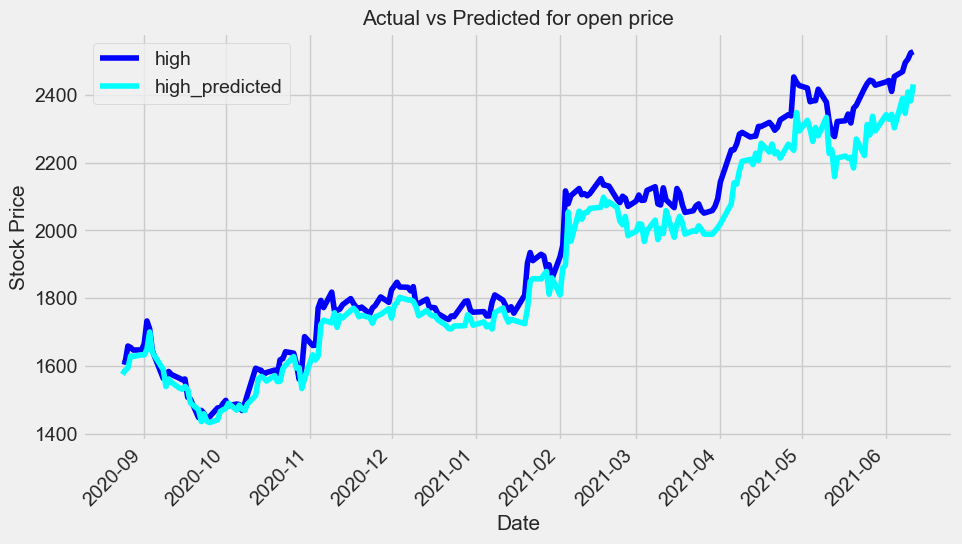

In [39]:
merge_data[['high','high_predicted']].plot(figsize=(10,6),color=['blue', 'cyan'])
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

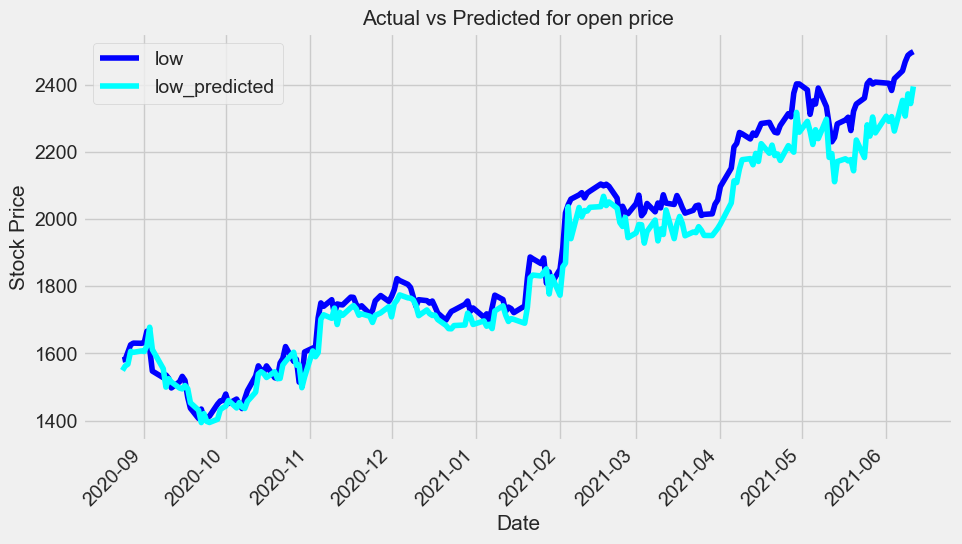

In [41]:

merge_data[['low','low_predicted']].plot(figsize=(10,6),color=['blue', 'cyan'])
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

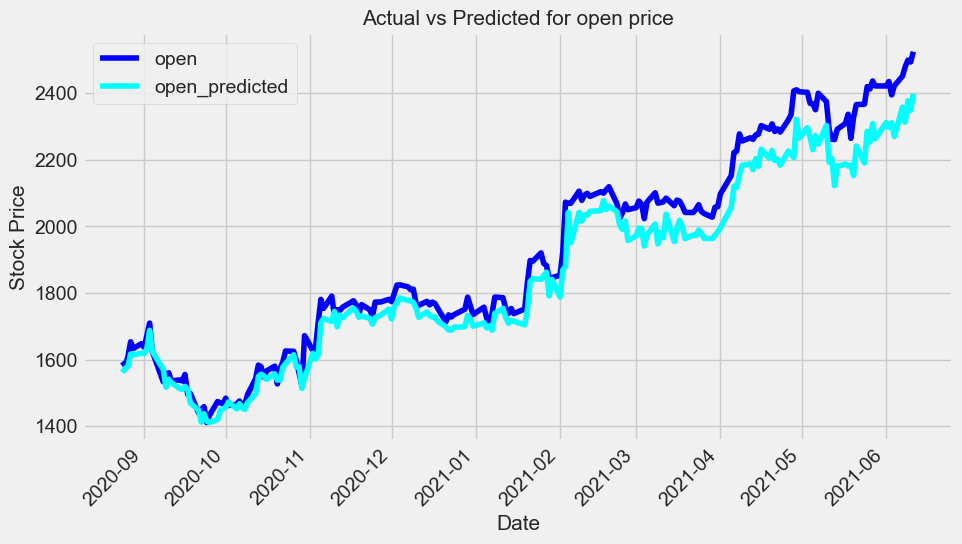

In [42]:
merge_data[['open','open_predicted']].plot(figsize=(10,6),color=['blue', 'cyan'])
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

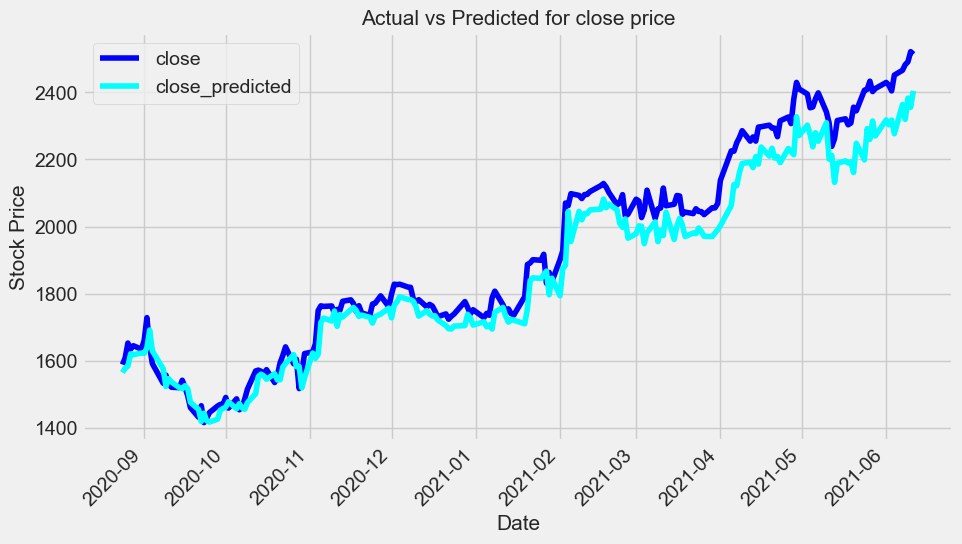

In [43]:
merge_data[['close','close_predicted']].plot(figsize=(10,6),color=['blue', 'cyan'])
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

In [44]:
# Creating a dataframe and adding 15 days to existing index 

merge_data_2 = merge_data.append(pd.DataFrame(columns=merge_data.columns,index=pd.date_range(start=merge_data.index[-1], periods=11, freq='D', closed='right')))

In [45]:
merge_data_2['2021-06-09':'2021-06-21']

,high,low,open,close,high_predicted,low_predicted,open_predicted,close_predicted
2021-06-09,2505.00,2487.33,2499.50,2491.40,2408.191650,2372.696777,2377.294189,2383.061768
2021-06-10,2523.26,2494.00,2494.01,2521.60,2381.849365,2343.861816,2349.380127,2355.700195
2021-06-11,2526.99,2498.29,2524.92,2513.93,2430.519775,2394.661621,2398.810059,2404.589844
2021-06-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
upcoming_prediction = pd.DataFrame(columns=['high','low','open','close'],index=merge_data_2.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [47]:
curr_seq = X_test[-1:]

for i in range(-10,0):
  up_pred = regressor.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(X_test[-1:].shape)

1/1 [==============================] - 0s 65ms/step


In [48]:
upcoming_prediction[['high','low','open','close']] = MMS.inverse_transform(upcoming_prediction[['high','low','open','close']])

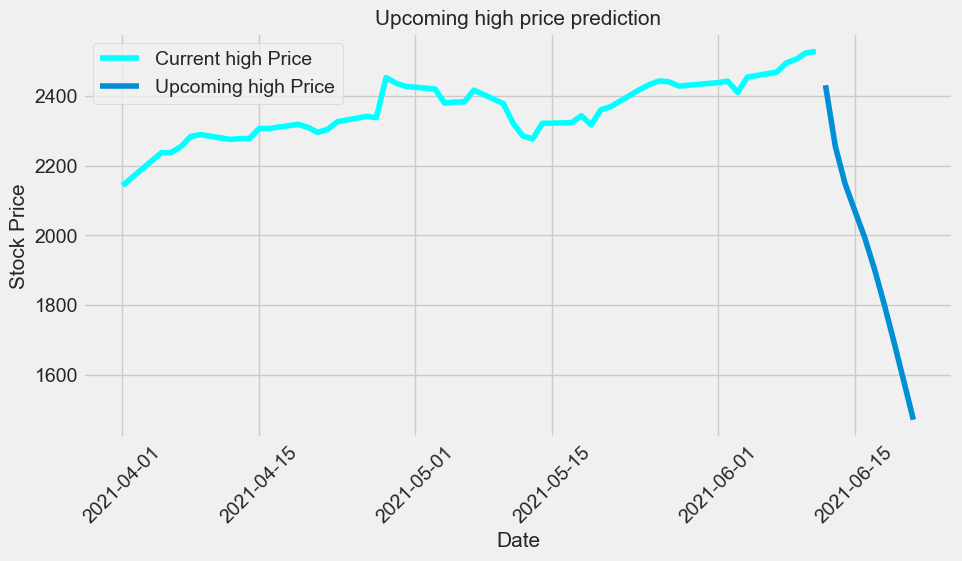

In [49]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(merge_data_2.loc['2021-04-01':,'high'],label='Current high Price',color='cyan')
ax.plot(upcoming_prediction.loc['2021-04-01':,'high'],label='Upcoming high Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming high price prediction',size=15)
ax.legend()
fg.show()

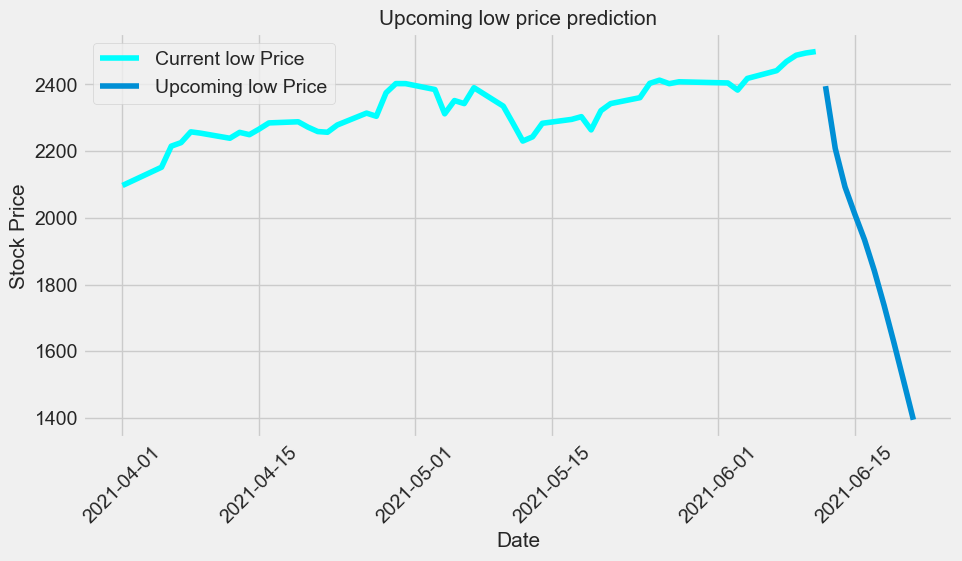

In [50]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(merge_data_2.loc['2021-04-01':,'low'],label='Current low Price',color='cyan')
ax.plot(upcoming_prediction.loc['2021-04-01':,'low'],label='Upcoming low Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming low price prediction',size=15)
ax.legend()
fg.show()

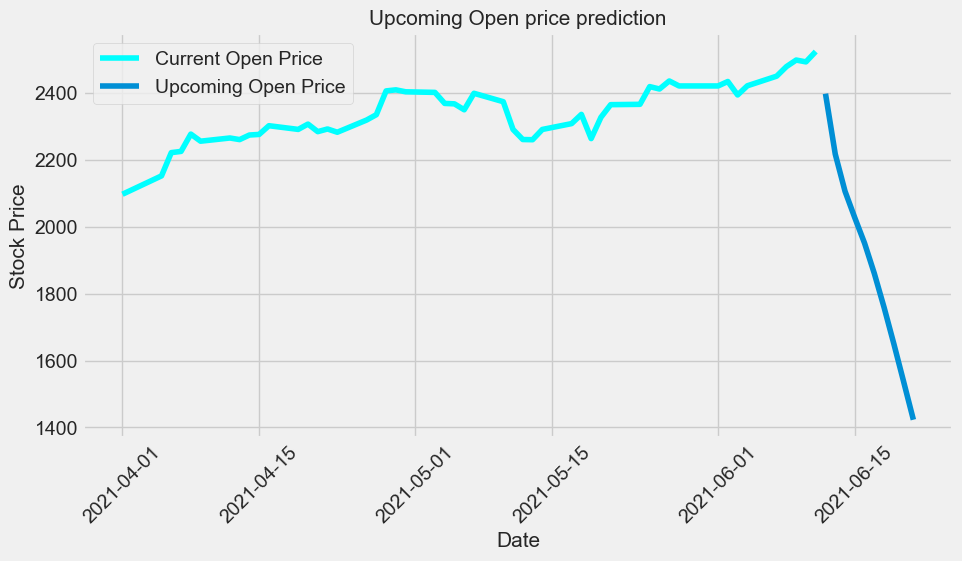

In [51]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(merge_data_2.loc['2021-04-01':,'open'],label='Current Open Price',color='cyan')
ax.plot(upcoming_prediction.loc['2021-04-01':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fg.show()

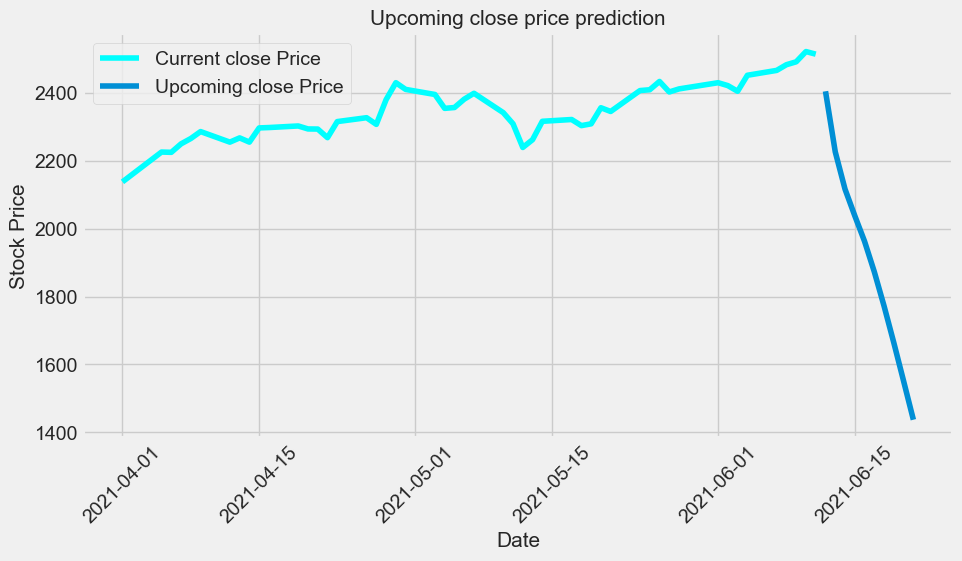

In [52]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(merge_data_2.loc['2021-04-01':,'close'],label='Current close Price',color='cyan')
ax.plot(upcoming_prediction.loc['2021-04-01':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fg.show()